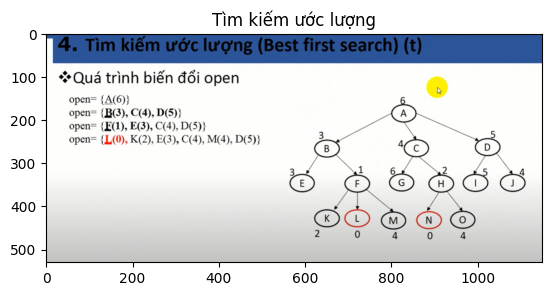

In [2]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

plt.title("Tìm kiếm ước lượng")

image = mpimg.imread("index.png")
plt.imshow(image)
plt.show()

In [4]:
from collections import defaultdict
from queue import PriorityQueue

data = defaultdict(list)
data['A'] = ['B', 'C', 'D', 6]
data['B'] = ['E', 'F',3]
data['C'] = ['G', 'H',4]
data['D'] = ['I', 'G',5]
data['E'] = [3]
data['F'] = ['K', 'L', 'M',1]
data['G'] = [6]
data['H'] = ['N', 'O',2]
data['I'] = [5]
data['J'] = [4]
data['K'] = [2]
data['L'] = [0]
data['M'] = [4]
data['N'] = [0]
data['O'] = [4]

In [5]:
class Node:
    def __init__(self, name, par = None, h =0):
        self.name = name
        self.par = par
        self.h = h
    def display(self):
        print(self.name, self.h)
    def __lt__(self, other):
        if other == None:
            return False
        return self.h < other.h
    def __eq__(self, other):
        if other == None:
            return False
        return self.name == other.name


In [6]:
def equal (O, G):
    if O.name == G.name:
        return True
    return False
def checkInPriority(tmp, c):
    if tmp ==None:
        return False
    return (tmp in c.queue)
def getPath(O, distance):
    print(O.name)
    distance += O.h
    if O.par != None:
        getPath(O.par, distance)
    else:
        print('distance: ' , distance)
        return

In [7]:
from turtle import distance


def BestFirstSearch(S = Node('A'), G = Node('N')):
    Open = PriorityQueue()
    Closed = PriorityQueue()
    S.h = data[S.name][-1]
    Open.put(S)
    while True:
        if Open.empty() == True:
            print("Tim kiem that bai")
            return
        O = Open.get()
        Closed.put(O)
        print('duyet: ' , O.name, O.h)
        if equal(O, G) == True:
            print("Tim kiem thanh cong")
            distance = 0
            getPath(O, distance)
            return
        i =0
        while i < len(data[O.name]) -1:
            name = data[O.name][i]
            h = data[name][-1]

            tmp = Node(name = name, h = h)
            tmp.par = O

            ok1 = checkInPriority(tmp, Open)
            ok2 = checkInPriority(tmp, Closed)

            if not ok1 and not ok2:
                Open.put(tmp)
            i+=1

In [8]:
BestFirstSearch(Node('A'), Node('N'))

duyet:  A 6
duyet:  B 3
duyet:  F 1
duyet:  L 0
duyet:  K 2
duyet:  E 3
duyet:  C 4
duyet:  H 2
duyet:  N 0
Tim kiem thanh cong
N
H
C
A
distance:  12
